## Classification of MNIST digits with a simple model consisting of a single dense layer with softmax activation

## Loading the image data


In [0]:
from keras.datasets import mnist

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

## Preparing the image data


In [0]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

## Preparing the labels


In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

## Deplaying some of the original and prepared image data and labels


In [20]:
train_images.shape

(60000, 784)

In [21]:
train_images_original.shape

(60000, 28, 28)

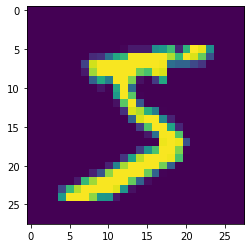

In [22]:
import matplotlib.pyplot as plt
plt.imshow(train_images_original[0])
plt.show()

In [23]:
train_labels.shape

(60000, 10)

In [24]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
import numpy as np

In [26]:
np.argmax(train_labels[0])

5

In [27]:
train_labels_original[0]

5

In [28]:
train_labels[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [29]:
np.argmax(train_labels[1])

0

In [30]:
train_labels_original[1]

0

In [31]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## The network architecture


In [32]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


##The compilation step


In [33]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## The training step


In [34]:
epochs = 10
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 7s 117us/step - loss: 0.2555 - acc: 0.9258 - val_loss: 0.1220 - val_acc: 0.9635
Epoch 2/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.1030 - acc: 0.9684 - val_loss: 0.0947 - val_acc: 0.9711
Epoch 3/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.0683 - acc: 0.9793 - val_loss: 0.0762 - val_acc: 0.9787
Epoch 4/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.0501 - acc: 0.9851 - val_loss: 0.0722 - val_acc: 0.9785
Epoch 5/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.0377 - acc: 0.9882 - val_loss: 0.0718 - val_acc: 0.9780
Epoch 6/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.0287 - acc: 0.9911 - val_loss: 0.0651 - val_acc: 0.9813
Epoch 7/10
60000/60000 [=

## Display the training/test loss/accuracy


In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

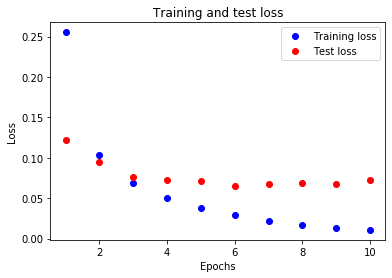

In [36]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

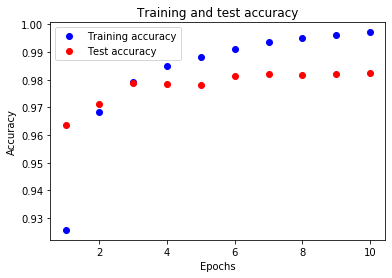

In [38]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()